In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (25,9)

In [ ]:
url = 'https://raw.githubusercontent.com/Avi-2362/ML-1/main/Face.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0
5,0.549587,0.545455,0.541322,0.537190,0.537190,0.533058,0.528926,0.533058,0.590909,0.611570,...,0.619835,0.623967,0.615702,0.661157,0.661157,0.690083,0.714876,0.706612,0.702479,0
6,0.330578,0.305785,0.330578,0.351240,0.425620,0.500000,0.603306,0.632231,0.644628,0.644628,...,0.541322,0.541322,0.524793,0.537190,0.487603,0.190083,0.144628,0.152893,0.152893,0
7,0.128099,0.185950,0.247934,0.314050,0.388430,0.462810,0.520661,0.557851,0.590909,0.623967,...,0.157025,0.165289,0.148760,0.157025,0.157025,0.152893,0.152893,0.173554,0.173554,0
8,0.243802,0.297521,0.367769,0.454545,0.495868,0.537190,0.578512,0.603306,0.611570,0.632231,...,0.669422,0.537190,0.235537,0.169422,0.177686,0.190083,0.190083,0.181818,0.190083,0
9,0.380165,0.442149,0.483471,0.545455,0.582645,0.628099,0.648760,0.677686,0.690083,0.710744,...,0.157025,0.165289,0.148760,0.165289,0.173554,0.173554,0.173554,0.173554,0.173554,0


In [ ]:
p,q = df.shape 
print("Number of data items (faces) in dataset =",p)
print("Number of attributes in the dataset     =",q)

Number of data items (faces) in dataset = 400
Number of attributes in the dataset     = 4097


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,400.0,0.400134,0.180695,0.086777,0.243802,0.392562,0.528926,0.805785
1,400.0,0.434236,0.189504,0.066116,0.267562,0.458678,0.575413,0.822314
2,400.0,0.476281,0.194742,0.090909,0.314050,0.512397,0.636364,0.871901
3,400.0,0.518481,0.193313,0.041322,0.383264,0.545455,0.666322,0.892562
4,400.0,0.554845,0.188593,0.107438,0.446281,0.584711,0.702479,0.871901
...,...,...,...,...,...,...,...,...
4092,400.0,0.335909,0.195280,0.049587,0.173554,0.299587,0.462810,0.921488
4093,400.0,0.321415,0.187842,0.057851,0.173554,0.289256,0.446281,0.929752
4094,400.0,0.313647,0.183616,0.061983,0.173554,0.270661,0.414256,0.884298
4095,400.0,0.310455,0.180635,0.033058,0.172521,0.272727,0.417355,0.822314


In [ ]:
labels=df["target"]
labels

0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: target, Length: 400, dtype: int64

In [ ]:
pixels=df.drop(['target'],axis = 1)
pixels

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.388430,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.380165,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669422,0.673554,0.702479,...,0.194215,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.446281,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306


In [ ]:
def show_orignal_images(pixels):
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

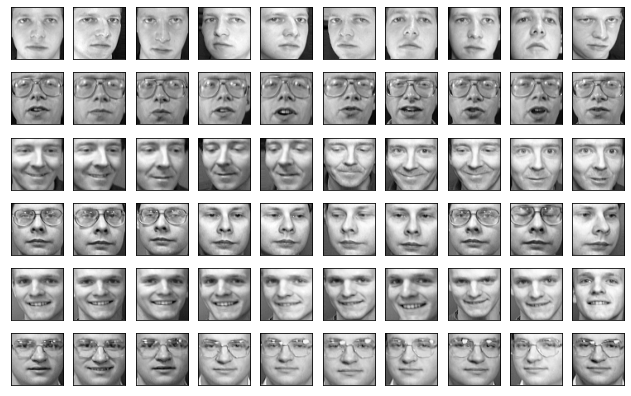

In [ ]:
show_orignal_images(pixels)

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split (pixels,labels)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(135).fit(x_train)

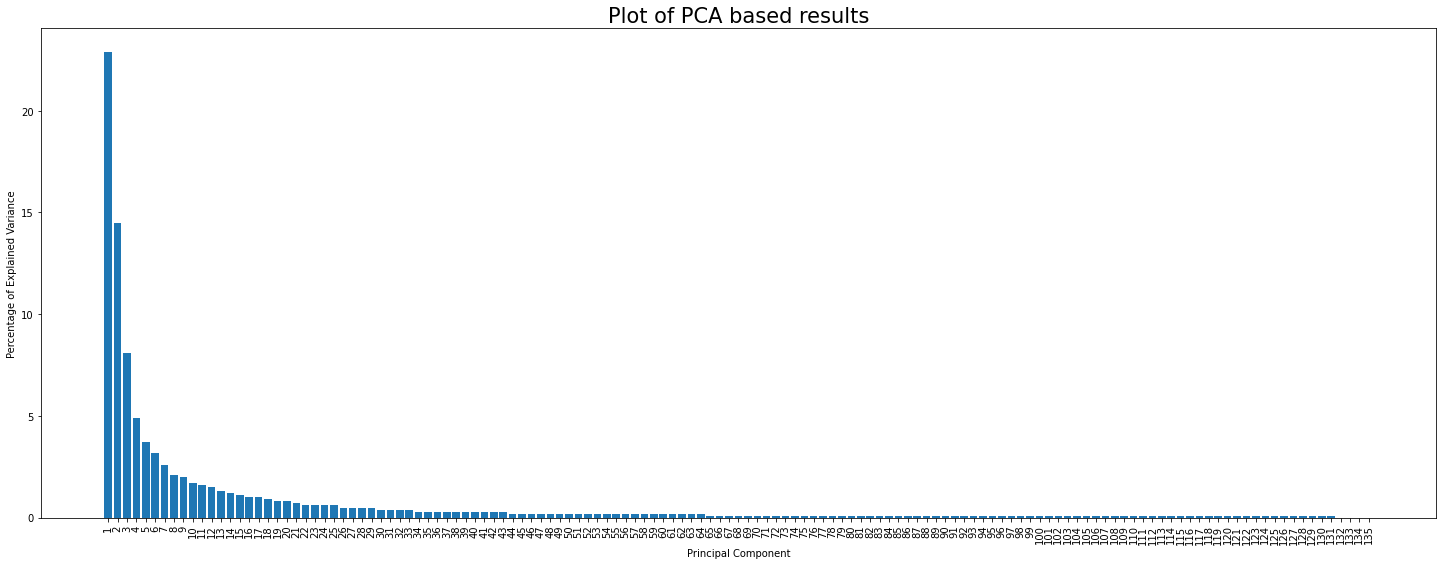

In [ ]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation=90)
plt.title('Plot of PCA based results',size=21)
plt.show()

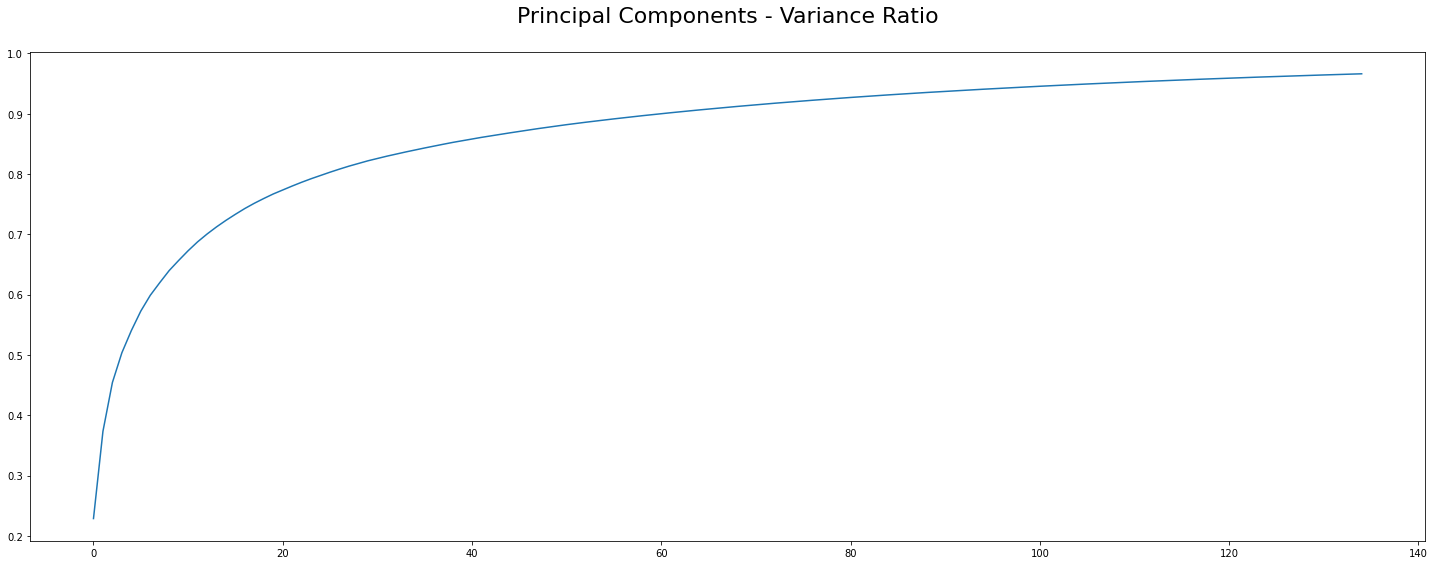

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Components - Variance Ratio\n',size=22)
plt.show()

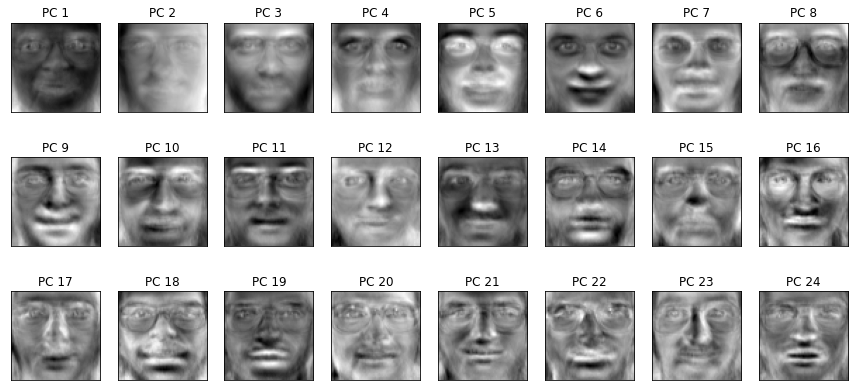

In [ ]:
def show_eigenfaces(pca):
   fig, axes = plt.subplots(3, 8, figsize=(15, 7),subplot_kw={'xticks':[], 'yticks':[]})
   for i, ax in enumerate(axes.flat):
       ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
       ax.set_title("PC " + str(i+1))
   plt.show()

show_eigenfaces(pca)

In [ ]:
x_train_pca=pca.transform(x_train)
from time import time
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
clf=SVC(kernel="rbf",C=1000,gamma=0.01)
clf.fit(x_train_pca,y_train)

SVC(C=1000, gamma=0.01)

In [ ]:
x_test_pca=pca.transform(x_test)
y_pred=clf.predict(x_test_pca)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       0.67      0.67      0.67         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [ ]:
y_pred

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  0,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  7, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36])

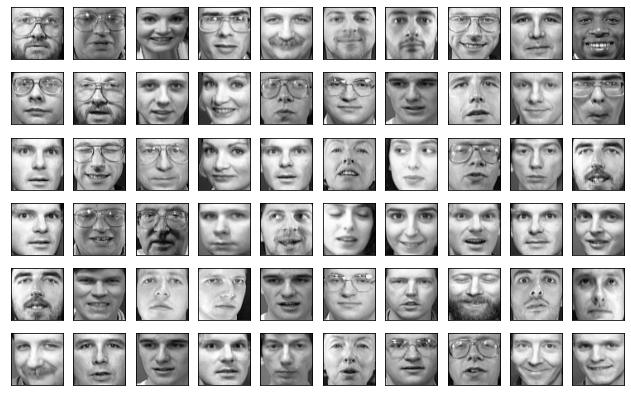

In [ ]:
show_orignal_images(x_test)

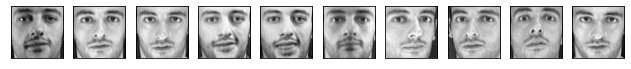

In [ ]:
image1=df[df.target==15].drop(["target"],axis=1)

def show_orignal_images1(pixels):
  fig, axes = plt.subplots(1, 10, figsize=(11, 7), subplot_kw={'xticks':[], 'yticks':[]})
  for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
  plt.show()

show_orignal_images1(image1)